In [1]:
import numpy as np
from tabulate import tabulate 
from matplotlib import pyplot as plt

# Least Square Fitting

### Working Procedure
To fit the line y = a + bx, we have the following two equations

$\sum y = na + b\sum x \quad \text{(1)}$

$\sum xy = a\sum x + b\sum x^2 \quad \text{(2)}$

Solving these two equations will provide us with the values of `a` and `b`, which represent the intercept and slope of the best fit, respectively

   Xi     Yi      Xi*Yi        Xi²
-----  -----  ---------  ---------
 3.8   0.109    14.44      0.4142
 8.26  0.231    68.2276    1.90806
15.31  0.409   234.396     6.26179
19.31  0.472   372.876     9.11432
21.39  0.566   457.532    12.1067
26.52  0.7     703.31     18.564
36.27  0.941  1315.51     34.1301
40.79  1.315  1663.82     53.6388
43.01  1.441  1849.86     61.9774
62.79  2.073  3942.58    130.164

The Equation of the best fit is y = 0.03391397259201393*x + -0.11524316956542634

∑(x)  = 277.45
∑(y)  = 8.257
∑(xy) = 328.27911
∑(x²) = 10622.5635

Slope = 0.03391397259201393
Intercept = -0.11524316956542634

Error in Slope = 0.0017601988467113167
Error in Intercept = 0.057368883795324725

σy = 0.0951926415426897
∆ = 29247.13250000002


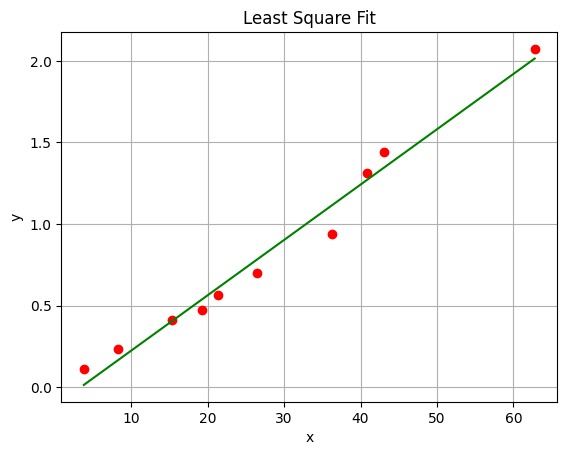

In [6]:
x_data = [3.80,8.26,15.31,19.31,21.39,26.52,36.27,40.79,43.01,62.79]
y_data = [0.109,0.231,0.409,0.472,0.566,0.700,0.941,1.315,1.441,2.073]

x = np.array(x_data)
y = np.array(y_data)
n = len(x)

if n != len(y):
    print("Data not complete!!")

x2 = np.square(x)
xy = np.array(x*y)

sigma_x = np.sum(x)
sigma_x2 = np.sum(x2)
sigma_y = np.sum(y)
sigma_xy = np.sum(xy)

# Solving the 2 linear equations as discussed 
# 1) ∑y = na + b∑x 
# 2) ∑xy = a∑x + b∑x²

# Using basic linear algebra 
# A . X = B 
# X = A^-1 . B 

A = np.array([[sigma_x,n],[sigma_x2,sigma_x]])
B = np.array([[sigma_y],[sigma_xy]])
X = np.linalg.inv(A).dot(B)

slope , intercept = X[0][0] , X[1][0]

delta = n*sigma_x2 - (sigma_x)**2
sig_y = (np.sum(np.square(y-x*slope-intercept))/(n-2))**0.5
# SD in slope and intercept 
sig_slope = sig_y * (n/delta)**0.5
sig_intercept = sig_y * (sigma_x2/delta)**0.5

table = np.array([x,y,x2,xy]).transpose()
print(tabulate(table,headers= ["Xi","Yi","Xi*Yi","Xi²"],tablefmt = "outline"))

print(f"\nThe Equation of the best fit is y = {slope}*x + {intercept}")

print(f'\n∑(x)  = {sigma_x}\n∑(y)  = {sigma_y}\n∑(xy) = {sigma_xy}\n∑(x²) = {sigma_x2}\n')
print(f'Slope = {slope}\nIntercept = {intercept}\n')
print(f'Error in Slope = {sig_slope}\nError in Intercept = {sig_intercept}\n')
print(f'σy = {sig_y}\n∆ = {delta}')
# Data plotting 
plt.title("Least Square Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x ,y ,"o" , color = "red")
x = np.linspace(min(x),max(x),len(x))
y = slope*x + intercept
plt.plot(x,y,linestyle = "-",color = "green")
plt.grid()
plt.plot()
plt.show()


$\sigma_y = \sqrt{\frac{1}{N-2} \sum_{i=1}^{N} (y_i - A - Bx_i)^2}$

$\Delta = N \sum{x^2} - (\sum{x})^2$ 

$\sigma_B = \sigma_y \cdot \sqrt{\frac{N}{\Delta}}$

$\sigma_A = \sigma_y \cdot \sqrt{\frac{\sum{x^2}}{\Delta}}$